<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand name    48 non-null     object 
 1   Price         48 non-null     int64  
 2   Rating        46 non-null     float64
 3   Rating count  46 non-null     float64
 4   Review count  46 non-null     float64
 5   Ranking       48 non-null     int64  
 6   URL           48 non-null     object 
dtypes: float64(3), int64(2), object(2)
memory usage: 2.8+ KB
None
              Price     Rating  Rating count  Review count  Ranking
count     48.000000  46.000000     46.000000     46.000000    48.00
mean    8308.583333   4.167391    150.478261    150.478261    24.50
std     5298.890562   0.425861    240.861762    240.861762    14.00
min     1499.000000   2.900000      1.000000      1.000000     1.00
25%     3220.500000   4.000000     13.000000     13.000000    12.75
50%     7792.500000   4.200000     4

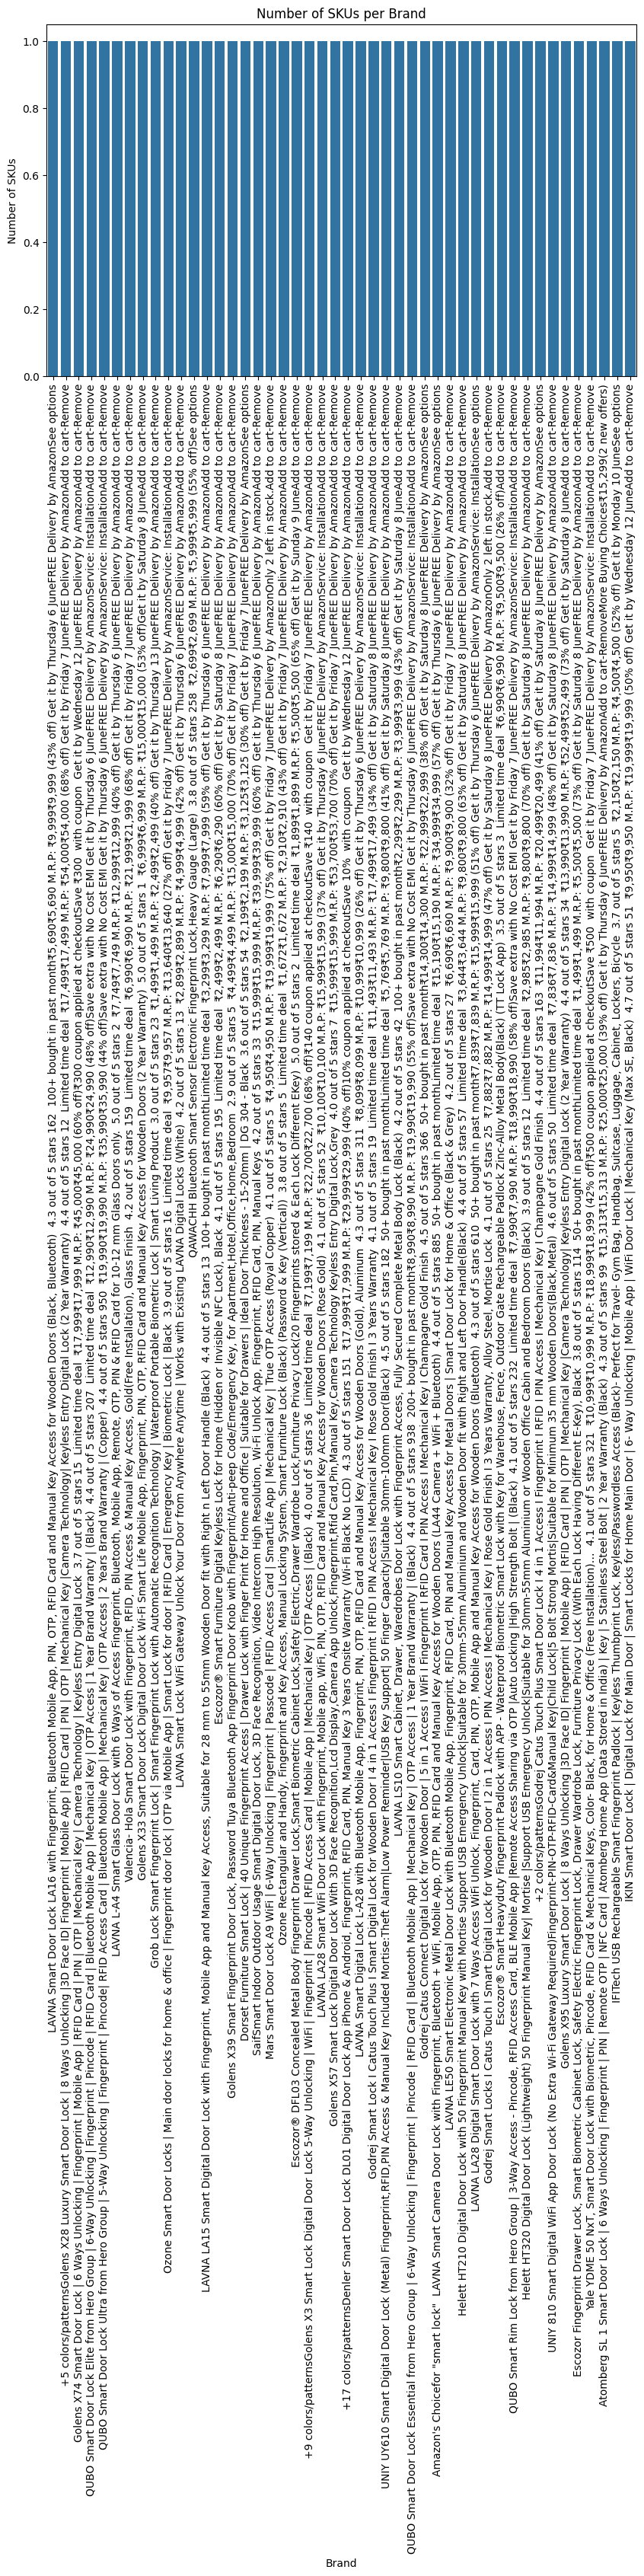

{'+17 colors/patternsDenler Smart Door Lock DL01 Digital Door Lock App iPhone & Android, Fingerprint, RFID Card, PIN, Manual Key 3 Years Onsite Warranty (Wi-Fi Black No LCD)  4.3 out of 5 stars 151  ₹17,999₹17,999 M.R.P: ₹29,999₹29,999 (40% off)10% coupon applied at checkoutSave 10%  with coupon  Get it by Wednesday 12 JuneFREE Delivery by AmazonAdd to cart-Remove': 25.0, '+2 colors/patternsGodrej Catus Touch Plus Smart Door Lock I 4 in 1 Access I Fingerprint I RFID I PIN Access I Mechanical Key I Champagne Gold Finish  4.4 out of 5 stars 163  ₹11,994₹11,994 M.R.P: ₹20,499₹20,499 (41% off) Get it by Saturday 8 JuneFREE Delivery by AmazonSee options': 16.0, '+5 colors/patternsGolens X28 Luxury Smart Door Lock | 8 Ways Unlocking |3D Face ID| Fingerprint | Mobile App | RFID Card | PIN | OTP | Mechanical Key |Camera Technology| Keyless Entry Digital Lock (2 Year Warranty)  4.4 out of 5 stars 12  Limited time deal  ₹17,499₹17,499 M.R.P: ₹54,000₹54,000 (68% off) Get it by Friday 7 JuneFREE D

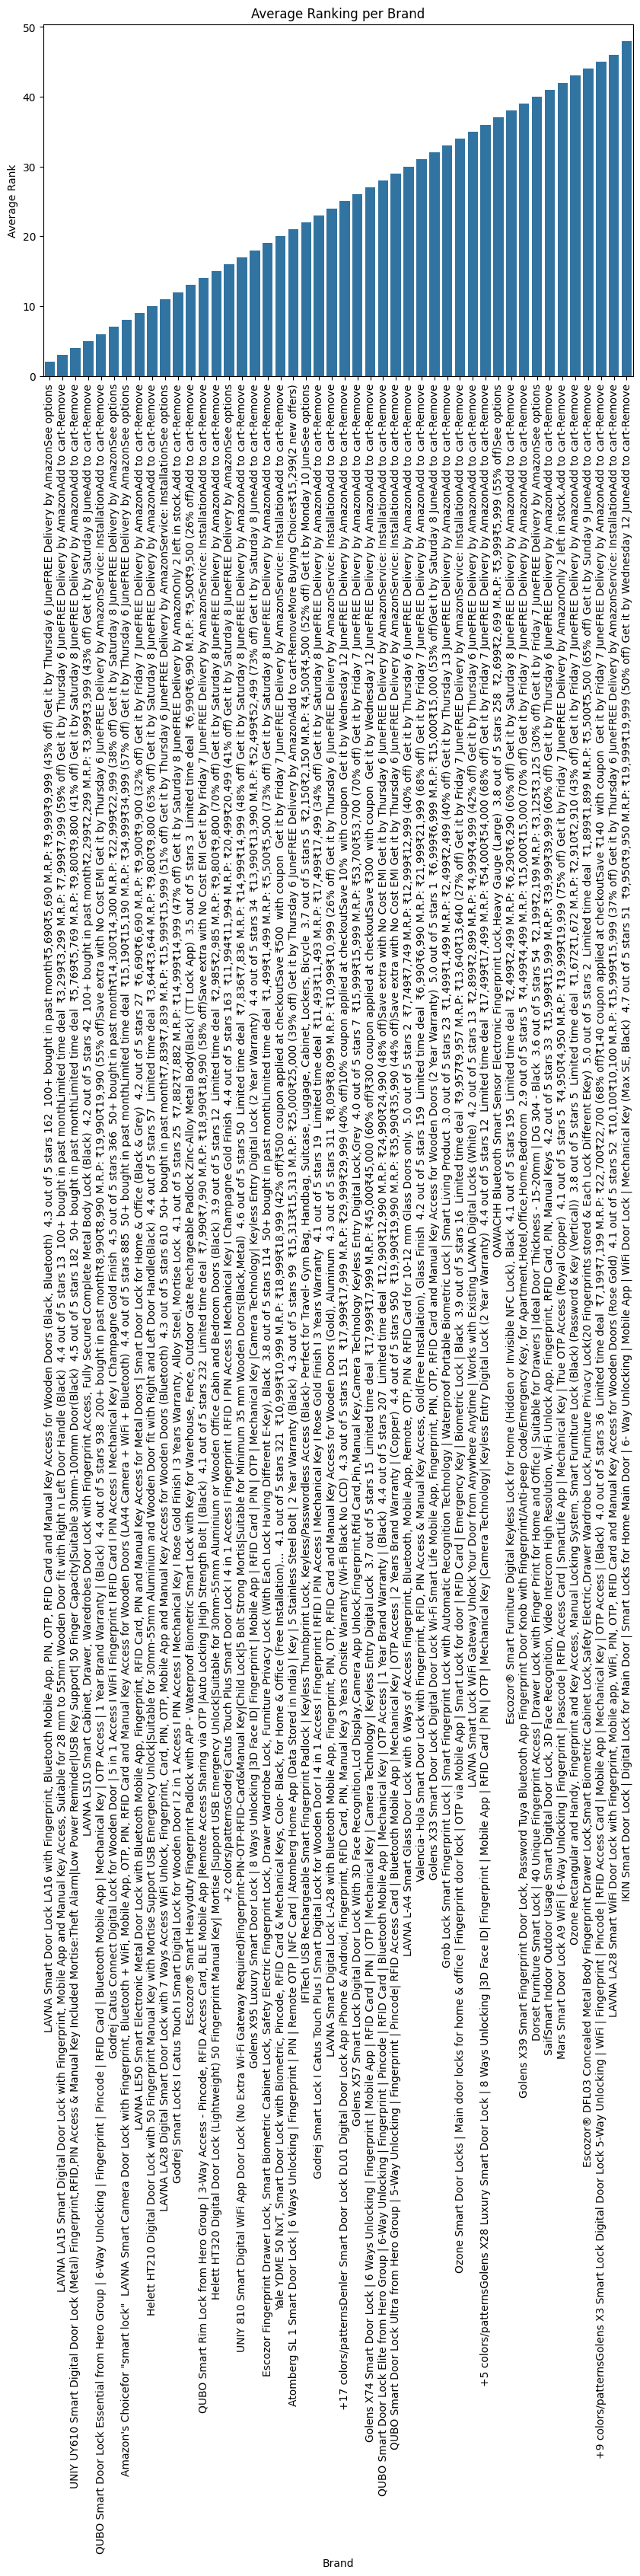

{'+17 colors/patternsDenler Smart Door Lock DL01 Digital Door Lock App iPhone & Android, Fingerprint, RFID Card, PIN, Manual Key 3 Years Onsite Warranty (Wi-Fi Black No LCD)  4.3 out of 5 stars 151  ₹17,999₹17,999 M.R.P: ₹29,999₹29,999 (40% off)10% coupon applied at checkoutSave 10%  with coupon  Get it by Wednesday 12 JuneFREE Delivery by AmazonAdd to cart-Remove': 4.3, '+2 colors/patternsGodrej Catus Touch Plus Smart Door Lock I 4 in 1 Access I Fingerprint I RFID I PIN Access I Mechanical Key I Champagne Gold Finish  4.4 out of 5 stars 163  ₹11,994₹11,994 M.R.P: ₹20,499₹20,499 (41% off) Get it by Saturday 8 JuneFREE Delivery by AmazonSee options': 4.4, '+5 colors/patternsGolens X28 Luxury Smart Door Lock | 8 Ways Unlocking |3D Face ID| Fingerprint | Mobile App | RFID Card | PIN | OTP | Mechanical Key |Camera Technology| Keyless Entry Digital Lock (2 Year Warranty)  4.4 out of 5 stars 12  Limited time deal  ₹17,499₹17,499 M.R.P: ₹54,000₹54,000 (68% off) Get it by Friday 7 JuneFREE Del

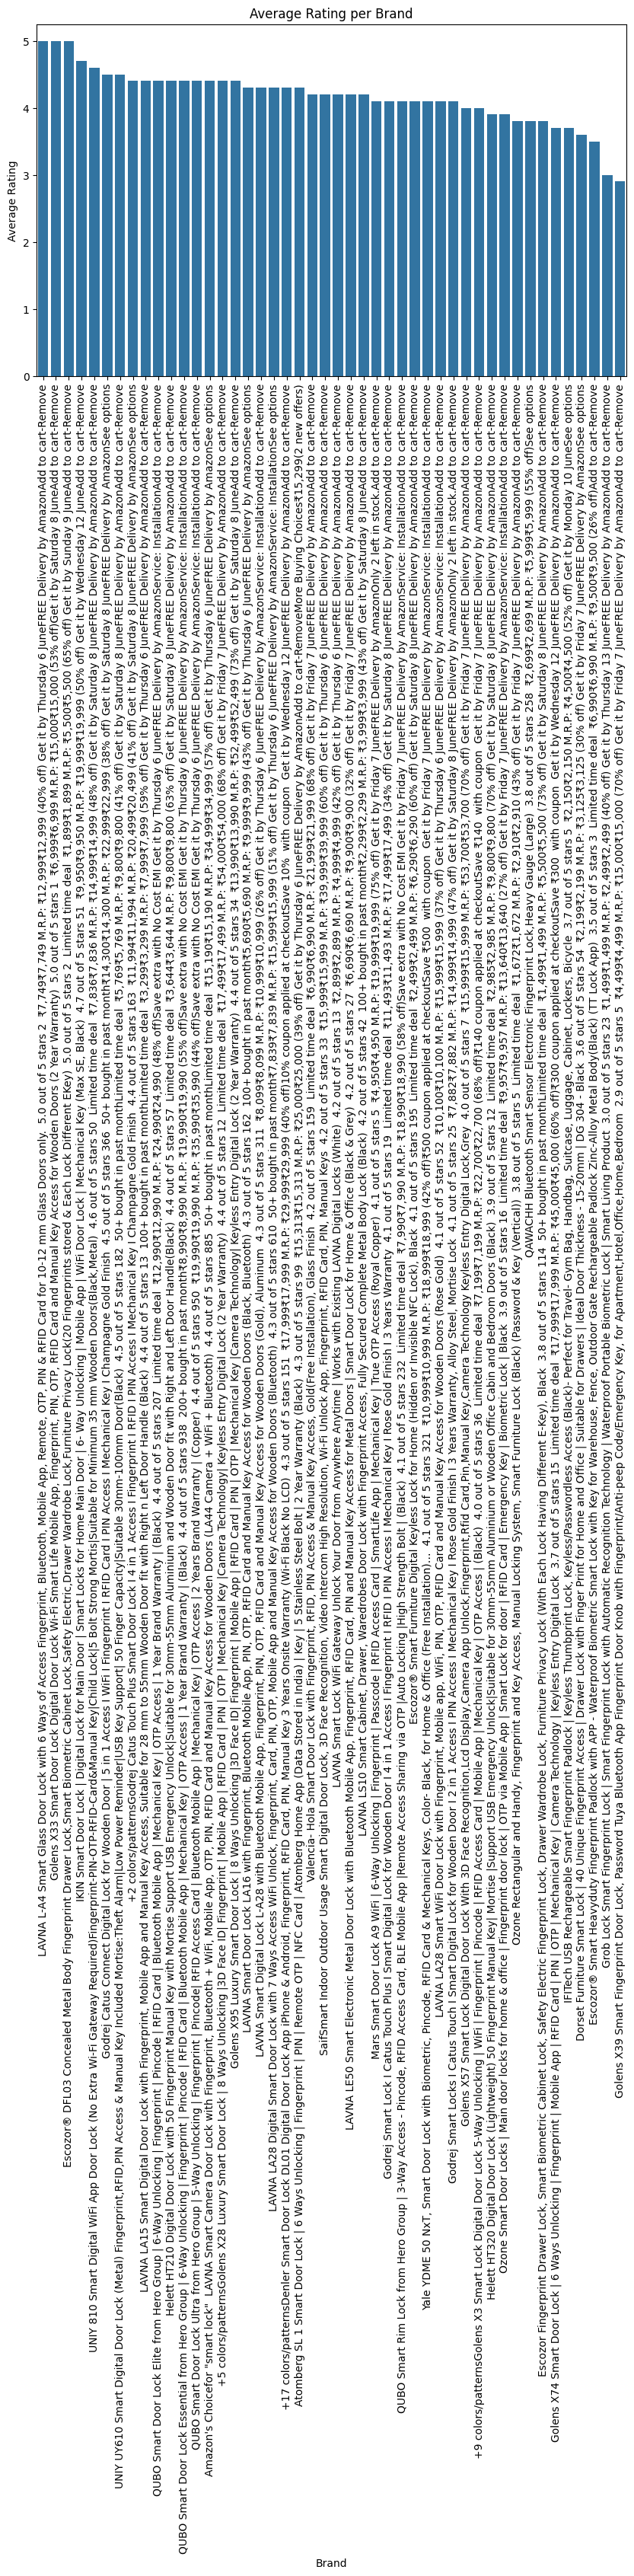

Price Band
<INR 3000          11
INR 3000-4999       4
INR 5000-9999      16
INR 10000-14999     7
INR 15000-19999     8
>INR 20000          0
Name: count, dtype: int64


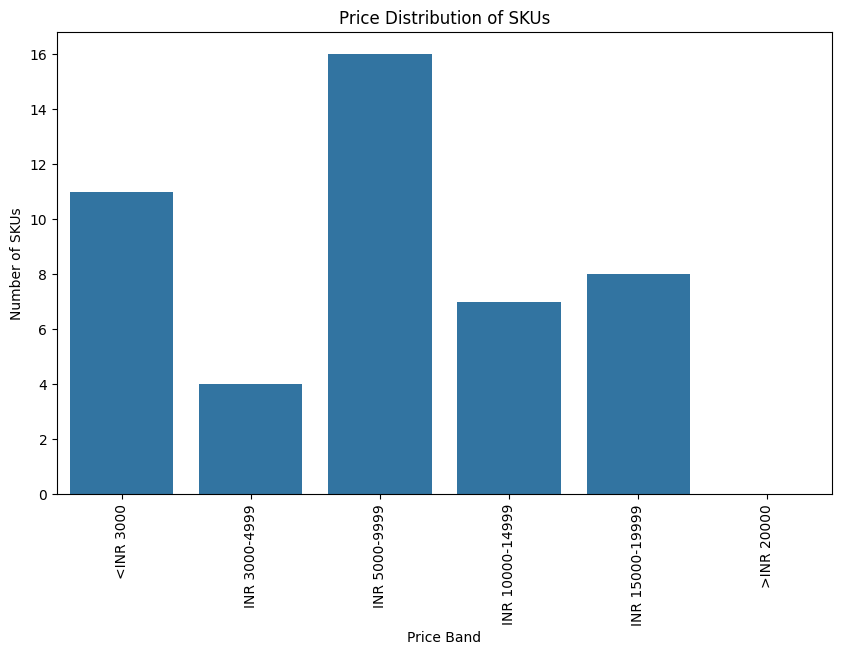

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the scraped data
data = pd.read_csv('smart_locks.csv')

# Inspect data for missing or inconsistent values
print(data.info())
print(data.describe())

# Handle missing values if any (e.g., drop or impute)
data = data.dropna()

# Ensure correct data types
data['Price'] = data['Price'].astype(int)
data['Rating'] = data['Rating'].astype(float)
data['Rating count'] = data['Rating count'].astype(int)
data['Review count'] = data['Review count'].astype(int)
data['Ranking'] = data['Ranking'].astype(int)

print(data.head())

# Analysis
# Number of brands in the segment
num_brands = data['Brand name'].nunique()
print(f"Number of brands: {num_brands}")

# Count of SKUs per brand
skus_per_brand = data['Brand name'].value_counts()
print(skus_per_brand)

# Plot the number of SKUs per brand
plt.figure(figsize=(10, 6))
sns.barplot(x=skus_per_brand.index, y=skus_per_brand.values)
plt.title('Number of SKUs per Brand')
plt.xlabel('Brand')
plt.ylabel('Number of SKUs')
plt.xticks(rotation=90)
plt.show()

# Relative ranking calculation
def relative_ranking(df):
    brand_ranks = df.groupby('Brand name')['Ranking'].apply(list)
    relative_ranks = {brand: sum(ranks)/len(ranks) for brand, ranks in brand_ranks.items()}
    return relative_ranks

relative_ranks = relative_ranking(data)
print(relative_ranks)

# Plot relative ranking
relative_ranks_df = pd.DataFrame(list(relative_ranks.items()), columns=['Brand', 'Average Rank'])
relative_ranks_df = relative_ranks_df.sort_values(by='Average Rank')

plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='Average Rank', data=relative_ranks_df)
plt.title('Average Ranking per Brand')
plt.xlabel('Brand')
plt.ylabel('Average Rank')
plt.xticks(rotation=90)
plt.show()

# Relative rating calculation
def relative_rating(df):
    brand_ratings = df.groupby('Brand name')['Rating'].apply(list)
    relative_ratings = {brand: sum(ratings)/len(ratings) for brand, ratings in brand_ratings.items()}
    return relative_ratings

relative_ratings = relative_rating(data)
print(relative_ratings)

# Plot relative ratings
relative_ratings_df = pd.DataFrame(list(relative_ratings.items()), columns=['Brand', 'Average Rating'])
relative_ratings_df = relative_ratings_df.sort_values(by='Average Rating', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='Average Rating', data=relative_ratings_df)
plt.title('Average Rating per Brand')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

# Price distribution of SKUs
price_bins = [0, 3000, 5000, 10000, 15000, 20000, float('inf')]
price_labels = ['<INR 3000', 'INR 3000-4999', 'INR 5000-9999', 'INR 10000-14999', 'INR 15000-19999', '>INR 20000']
data['Price Band'] = pd.cut(data['Price'], bins=price_bins, labels=price_labels)

price_distribution = data['Price Band'].value_counts().sort_index()
print(price_distribution)

# Plot price distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=price_distribution.index, y=price_distribution.values)
plt.title('Price Distribution of SKUs')
plt.xlabel('Price Band')
plt.ylabel('Number of SKUs')
plt.xticks(rotation=90)
plt.show()

# Save analysis results to CSV
analysis_results = {
    'Number of Brands': num_brands,
    'SKUs per Brand': skus_per_brand.to_dict(),
    'Relative Ranks': relative_ranks,
    'Relative Ratings': relative_ratings,
    'Price Distribution': price_distribution.to_dict()
}

analysis_df = pd.DataFrame(list(analysis_results.items()), columns=['Metric', 'Value'])
analysis_df.to_csv('analysis_results.csv', index=False)